In [14]:
import pickle as pkl
import numpy as np
import healpy as hp
from pysimulators import FitsArray

In [2]:
from qubic.lib.MapMaking.FrequencyMapMaking.Qspectra_component import CMBModel
import pysm3
import pysm3.units as u

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


# Test pickle files

In [3]:
allDataSet = pkl.load(open("/home/laclavere/Thesis/qubic/qubic/data/AllDataSet_Components_MapMaking.pkl", "rb"))

In [4]:
allDataSet.keys()

dict_keys(['noise30', 'noise44', 'noise70', 'noise100', 'noise143', 'noise217', 'noise353', 'fwhm30', 'fwhm44', 'fwhm70', 'fwhm100', 'fwhm143', 'fwhm217', 'fwhm353', 'bw30', 'bw44', 'bw70', 'bw100', 'bw143', 'bw217', 'bw353'])

In [5]:
allDataSet["noise143"].shape

(786432, 3)

In [6]:
planck143 = pkl.load(open("/home/laclavere/Thesis/qubic/qubic/data/Planck143GHz.pkl", "rb"))

In [7]:
planck143["bw143"]

47.190000000000005

In [8]:
planck143.keys()

dict_keys(['noise143', 'fwhm143', 'bw143'])

In [9]:
planck143["noise143"]

array([[2.36981082, 4.9795866 , 5.03337717],
       [2.33347774, 4.86609936, 4.92461777],
       [2.33107471, 4.84755278, 4.89677191],
       ...,
       [2.50098896, 5.31425428, 5.30698824],
       [2.49292827, 5.2852459 , 5.3046813 ],
       [2.47027898, 5.17399645, 5.19079971]])

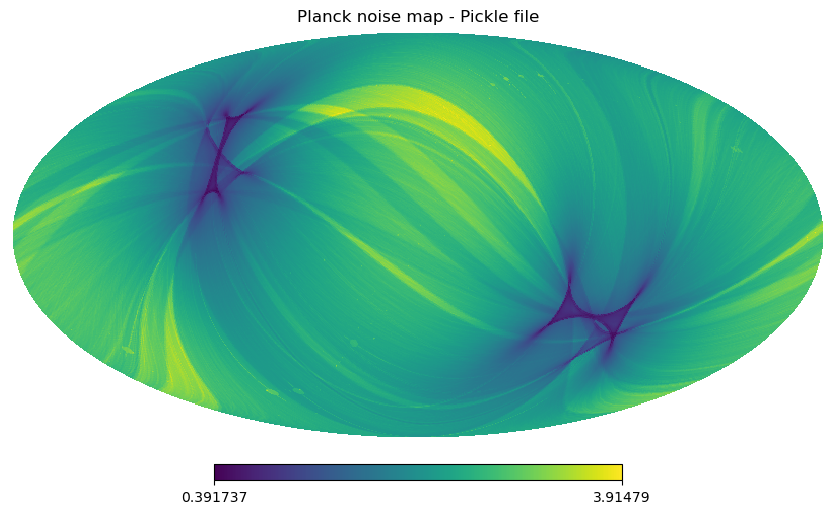

In [37]:
hp.mollview(planck143["noise143"][:, 0], title="Planck noise map - Pickle file")

In [10]:
np.array_equal(planck143["noise143"], allDataSet["noise143"])

True

# Test fits files

In [34]:
filename = "/home/laclavere/Thesis/qubic/qubic/data/Variance_Planck143GHz_Kcmb2_ns256.fits"
fits_143 = np.sqrt(np.array(FitsArray(filename))) * 1e6
print(fits_143.shape)

(786432, 3)


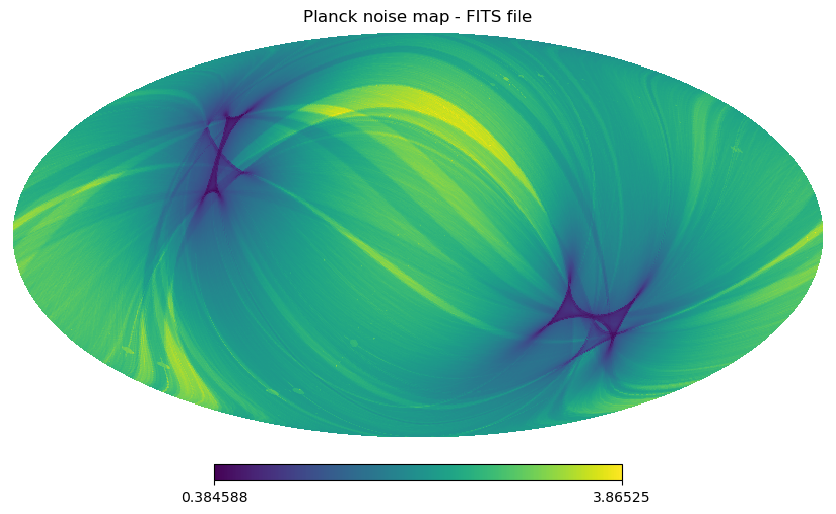

In [38]:
hp.mollview(fits_143[:, 0], title="Planck noise map - FITS file")

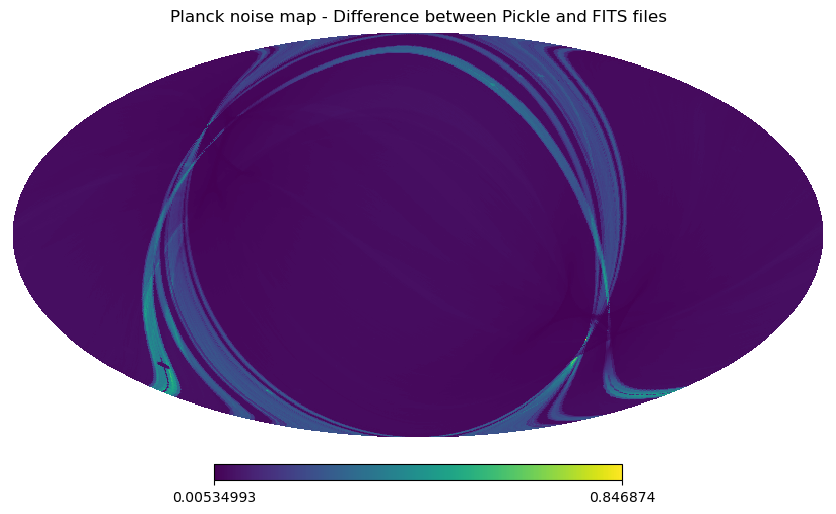

In [39]:
hp.mollview(planck143["noise143"][:, 0] - fits_143[:, 0], title="Planck noise map - Difference between Pickle and FITS files")

In [26]:
np.array_equal(planck143["noise143"], fits_143)

False

# Test PySM vs Spectrum

/tmp/ipykernel_432732/424763822.py:3: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_spectrum = hp.synfast(mycls, nside=256, verbose=False, new=True).T


(786432, 3)


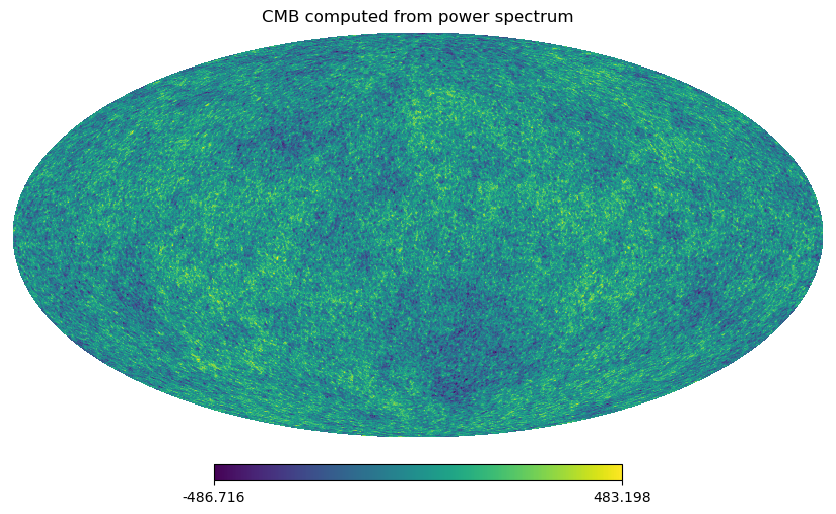

In [ ]:
cmbmodel = CMBModel(None)
mycls = cmbmodel.give_cl_cmb(r=0, Alens=1)
cmb_spectrum = hp.synfast(mycls, nside=256, verbose=False, new=True).T
print(cmb_spectrum.shape)
hp.mollview(cmb_spectrum[:, 0], title="CMB computed from power spectrum")

(786432, 3)


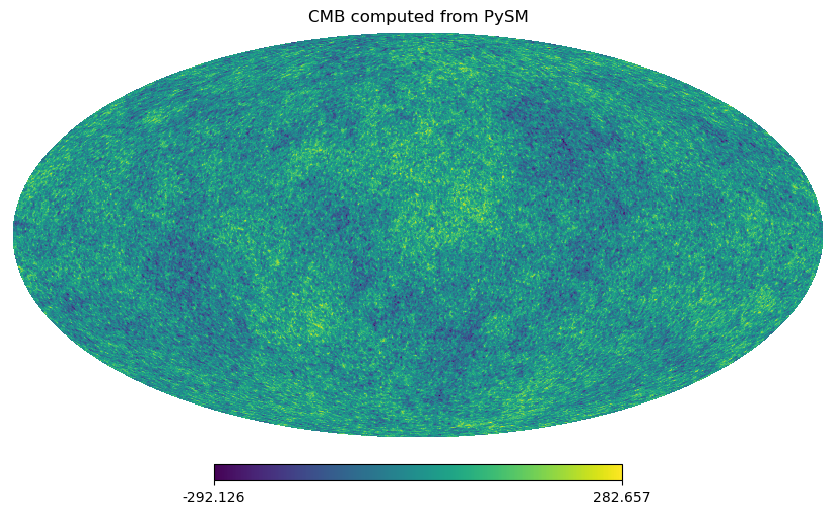

In [ ]:
_cmb = pysm3.Sky(nside=256, preset_strings=["c1"])
cmb_pysm = _cmb.get_emission(150*u.GHz).T
print(cmb_pysm.shape)
hp.mollview(cmb_pysm[:, 0], title="CMB computed from PySM")